In [1]:
import matplotlib.pyplot as plt
from Functions import mensualité, rendement

### Calcul de la mensualité:

$m$ = mensualité

$N$ = Durée du prêt (en années)

$\alpha$ = Taux d'intéret annuel

$C$ = montant du prêt


Au mois $n$, le restant à payer $C_n$ vaut: $C_n = C_{n-1} + \frac{\alpha}{12}C_{n-1}-m = \left(1+\frac{\alpha}{12}\right)C_{n-1}-m$

On reconnaît une suite arithmético-géométrique de terme général: $C_n = \left(1+\frac{\alpha}{12}\right)^n\left(C-\frac{12m}{\alpha}\right)+\frac{12m}\alpha$

Donc à l'année $N$, le restant à payer (qui doit être nul) vaut: $\left(1+\frac{\alpha}{12}\right)^{12N}\left(C-\frac{12m}{\alpha}\right)+\frac{12m}\alpha$. On obtient:

\begin{align}
m = \frac{\frac{\alpha C}{12}}{1-\left(1+\frac{\alpha}{12}\right)^{-12N}}
\end{align}

### Calcul du rendement au mois $n$ < $12N$

$\mu$ = croissance annuelle du bien immobilier

$l$ = loyer

$f_n$ = frais de notaire

$f_g$ = frais de gestion locative (en % du loyer)

$A$ = Apport

$p$ = prélèvements sociaux

$i$ = impôts

Au bout du mois $n$, le propriétaire possède:
- Le bien immobilier d'une valeur $(1+\mu)^{\frac{n}{12}}C$
- Le cumul des loyers s'élevant à hauteur de $nl$ (dont il faut déduire les impôts)

Il a dépensé $nm$ en mensualité, $nf_gl$ en frais de gestion locative, $f+A$ en apport total, et est endetté à hauteur de $C_n$

Son rendement au mois $n$ s'élève donc à:

\begin{align}
\eta = \frac{n(l(1-i)-m-f_gl)+\left(1+\mu\right)^\frac{n}{12}C-C_n-(f_n+A)}{f_n+A}
\end{align}

### Simulation: étude du rendement d'un investissement immobilier vs. en bourse

mensualité = 264 €/mois


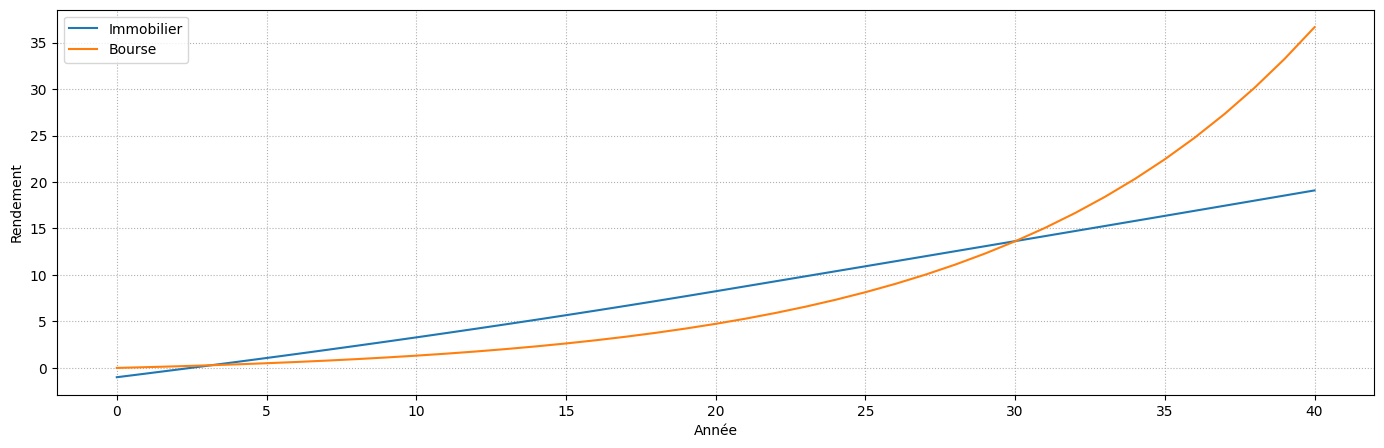

In [7]:
alpha = 2.5/100 # Taux du prêt
N = 20 # Durée totale du prêt
mu = 1/100 # Croissance de la valeur du bien immobilier
C = 50000 # Montant emprunté
l = 500 # Loyer
fn = 10000 # Frais de notaire et d'agence
A = 0 # 10/100*C # Apport
fg = 8/100 # Coûts de gestion locative (en % du loyer)
i = 12.8/100 # impôts sur le revenu

beta = 10/100 # Performance de la bourse
p = 17.2/100 # Prélèvements sociaux

m = mensualité(alpha, C, N)
print("mensualité =", int(m), "€/mois")

List_n = range(0, 41)
List_rendement_immo = []
List_rendement_bourse = []

for n in List_n:
    List_rendement_immo.append(rendement(12*n, l, alpha, C, N, mu, fn, A, fg, i))
    List_rendement_bourse.append(((1+beta)**n-1)*(1-p))

plt.figure(figsize=(17, 5))
plt.plot(List_n, List_rendement_immo, label='Immobilier')
plt.plot(List_n, List_rendement_bourse, label='Bourse')
plt.xlabel('Année')
plt.ylabel('Rendement')
plt.grid(linestyle=':')
plt.legend()